# Main for loop

change constant in foor loop under constant = to about 115.0/100.0 for cup, its kinda hard cus our lens doesnt distinguish the cup very clearly

In [2]:
import matplotlib.pyplot as plt
import cv2
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
import numpy as np
from keras.preprocessing import image
from skimage import measure
from PIL import Image
import math

Using TensorFlow backend.


In [47]:
for i in range(1,20):
    #load image
    image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
    image_rgb = np.array(image_rgb)
    
    #blur for robustness in finding brightest pixel luminosity value to get luminosity value for overall region
    #already calculated that a radius of 201 is ideal for consistency
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (201, 201), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    
    #convert to hsv
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
    
    #calculate luminosity for HSV depending on brightest pixel region value from super blurred image where constant is set to 
    #9/10's of the brightest pixel region by trial and error, can be less maybe, Set to 9/10's because it completed the ellipse on all of them
    constant = (90.0/100.0)
    luminosity = int((math.floor(maxVal * constant)))
    
    #treshold limits, 1st value is special at 103/102, works best a little under 103/102 for disk
    #second is set to 50 cus it works, ive tried like everything
    #third value is brightness which is essential for getting edges right
    lower_limit = np.array([100,50,luminosity])
    upper_limit = np.array([255,255,255])
    
    #apply thresholds
    mask = cv2.inRange(hsv, lower_limit, upper_limit)
    
    #calculate edges
    edges = canny(mask, sigma=12)
    
    detector = cv2.s
    fs = detector.detect(edges)
    fs.sort(key = lambda x: -x.size)

    
    def supress(x):
        for f in fs:
                distx = f.pt[0] - x.pt[0]
                disty = f.pt[1] - x.pt[1]
                dist = math.sqrt(distx*distx + disty*disty)
                if (f.size > x.size) and (dist<f.size/2):
                        return True

    sfs = [x for x in fs if not supress(x)]

    for f in sfs:
        cv2.circle(image_rgb, (int(f.pt[0]), int(f.pt[1])), int(f.size/2), d_red, 2, cv2.CV_AA)
        cv2.circle(image_rgb, (int(f.pt[0]), int(f.pt[1])), int(f.size/2), l_red, 1, cv2.CV_AA)
    
    #show images
    fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1
                                , sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

    ax1.set_title('Original picture')
    ax1.imshow(image_rgb)
    ax2.set_title('Flitered')
    ax2.imshow(mask)
    ax3.set_title('Edges')
    ax3.imshow(edges)

AttributeError: 'module' object has no attribute 'SIFT_create'

# Trying bullshit out

In [3]:
max_vals = []
for i in range(1,8):
    image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
    image_rgb = np.array(image_rgb)
    radius = 3
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (radius, radius), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    max_vals.append(maxVal)


In [4]:
max_vals

[179.0, 183.0, 97.0, 81.0, 87.0, 100.0, 189.0]

In [5]:
max_vals = []
for i in range(1,8):
    image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
    image_rgb = np.array(image_rgb)
    radius = 201
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (radius, radius), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    max_vals.append(maxVal)
print(max_vals)

[120.0, 137.0, 58.0, 46.0, 43.0, 73.0, 124.0]


In [6]:
max_vals

[120.0, 137.0, 58.0, 46.0, 43.0, 73.0, 124.0]

In [7]:
stuff = []
for j in range(3,413,2):
    summer = []
    for i in range(1,8):
        image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
        image_rgb = np.array(image_rgb)
        radius = j
        gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (radius, radius), 0)
        (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
        abs_difference = abs(max_vals[i - 1] - maxVal)
        max_vals[i - 1] = maxVal
        summer.append(abs_difference)
    stuff.append("range: " + str(j) + " with difference " + str(sum(summer)))
    



In [8]:
stuff

['range: 3 with difference 315.0',
 'range: 5 with difference 4.0',
 'range: 7 with difference 3.0',
 'range: 9 with difference 4.0',
 'range: 11 with difference 18.0',
 'range: 13 with difference 11.0',
 'range: 15 with difference 18.0',
 'range: 17 with difference 11.0',
 'range: 19 with difference 11.0',
 'range: 21 with difference 10.0',
 'range: 23 with difference 2.0',
 'range: 25 with difference 9.0',
 'range: 27 with difference 19.0',
 'range: 29 with difference 20.0',
 'range: 31 with difference 22.0',
 'range: 33 with difference 23.0',
 'range: 35 with difference 16.0',
 'range: 37 with difference 23.0',
 'range: 39 with difference 4.0',
 'range: 41 with difference 23.0',
 'range: 43 with difference 34.0',
 'range: 45 with difference 12.0',
 'range: 47 with difference 49.0',
 'range: 49 with difference 7.0',
 'range: 51 with difference 17.0',
 'range: 53 with difference 11.0',
 'range: 55 with difference 0.0',
 'range: 57 with difference 36.0',
 'range: 59 with difference 13.

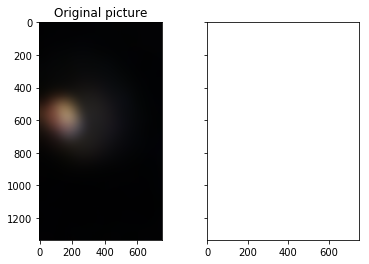

In [9]:
image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
image_rgb = np.array(image_rgb)
radius = 201
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.GaussianBlur(image_rgb, (radius, radius), 0)
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1
                                , sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

ax1.set_title('Original picture')
ax1.imshow(image_rgb)


In [10]:
radius = 41
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (radius, radius), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
print(maxVal)


125.0


In [11]:
lower_limit = np.array([44,44,44])
upper_limit = np.array([255,255,255])
mask = cv2.inRange(image_rgb, lower_limit, upper_limit)
disk = [44,44,44] 
cup = 

[255,255,255]

lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

SyntaxError: invalid syntax (<ipython-input-11-7fe5e9d076e2>, line 5)

In [12]:
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
lower_limit = np.array([47,57,44])
upper_limit = np.array([255,255,255])
mask = cv2.inRange(hsv, lower_limit, upper_limit)
edges = canny(mask, sigma=12)

In [13]:
max_vals = []
for i in range(1,8):
    image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
    image_rgb = np.array(image_rgb)
    radius = 201
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (radius, radius), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    max_vals.append(maxVal)
print(max_vals)

[120.0, 137.0, 58.0, 46.0, 43.0, 73.0, 124.0]


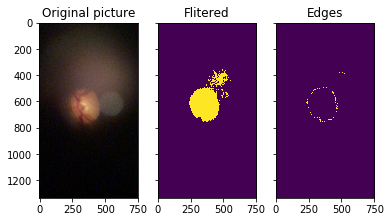

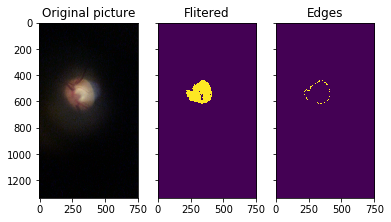

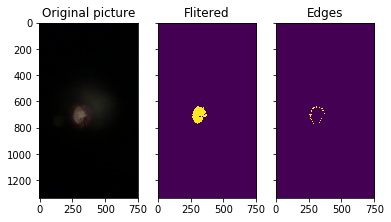

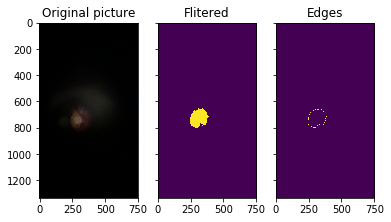

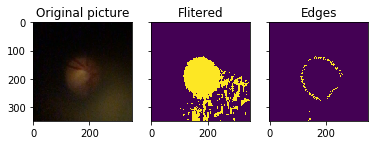

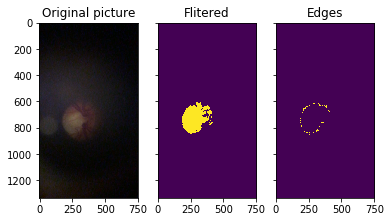

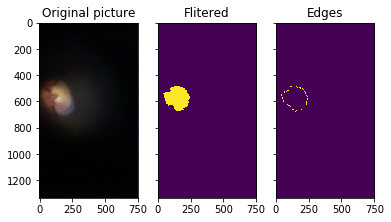

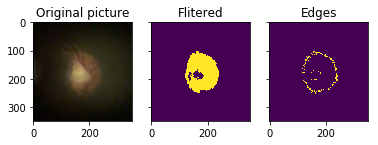

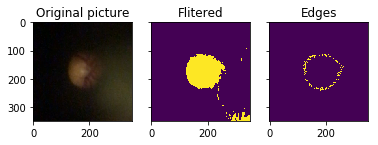

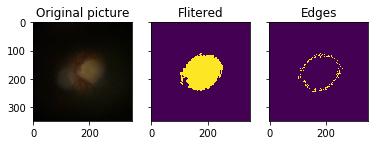

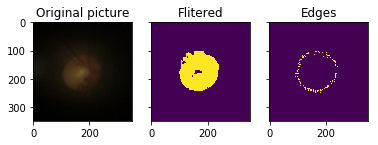

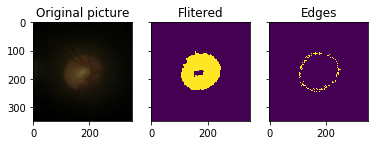

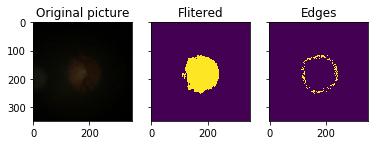

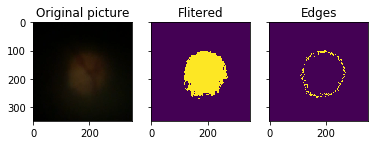

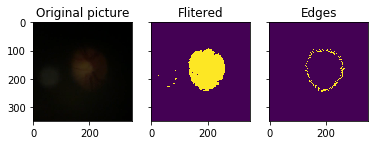

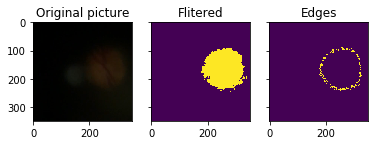

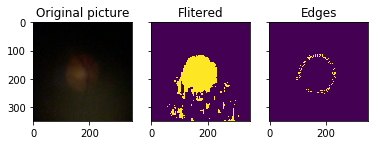

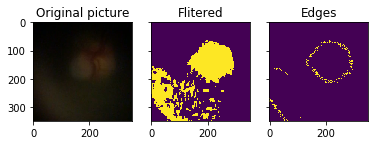

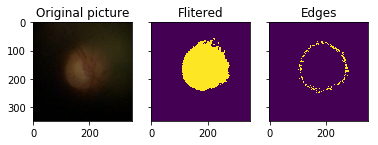

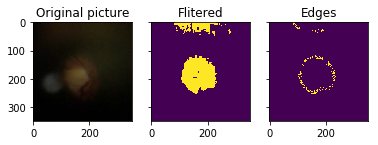

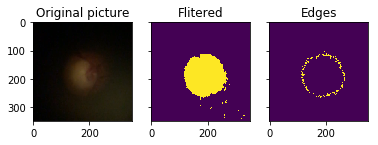

In [24]:
for i in range(1,22):
    #load image
    image_rgb = image.load_img("/Users/karimabedrabbo/Desktop/Old Data/tr_gc/" + str(i) + ".PNG")
    image_rgb = np.array(image_rgb)
    
    #blur for robustness in finding brightest pixel luminosity value to get luminosity value for overall region
    #already calculated that a radius of 201 is ideal for consistency
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (201, 201), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    
    #convert to hsv
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
    
    #calculate luminosity for HSV depending on brightest pixel region value from super blurred image where constant is set to 
    #9/10's of the brightest pixel region by trial and error, can be less maybe, Set to 9/10's because it completed the ellipse on all of them
    constant = (90.0/100.0)
    luminosity = int((math.floor(maxVal * constant)))
    
    #treshold limits, 1st value is special at 103/102, works best a little under 103/102 for disk
    #second value also really doesnt matter
    #third value is brightness which is essential for getting edges right
    lower_limit = np.array([100,50,luminosity])
    upper_limit = np.array([255,255,255])
    
    #apply thresholds
    mask = cv2.inRange(hsv, lower_limit, upper_limit)
    
    #calculate edges
    edges = canny(mask, sigma=12)
    
    #show images
    fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1
                                , sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

    ax1.set_title('Original picture')
    ax1.imshow(image_rgb)
    ax2.set_title('Flitered')
    ax2.imshow(mask)
    ax3.set_title('Edges')
    ax3.imshow(edges)

In [ ]:
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1
                                , sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

ax1.set_title('Original picture')
ax1.imshow(mask)
ax2.set_title('Edges')
ax2.imshow(edges)

In [98]:
contours = measure.find_contours(edges, .9)

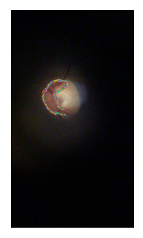

In [99]:
fig, ax = plt.subplots()
ax.imshow(image_rgb, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=.5)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [8]:
_, contours, _= cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 150) ):
        contour_list.append(contour)
print(contours)

TypeError: image data type = 0 is not supported

In [113]:
cv2.drawContours(edges, contour_list,  -1, (255,0,0), 2)

TypeError: image data type = 0 is not supported

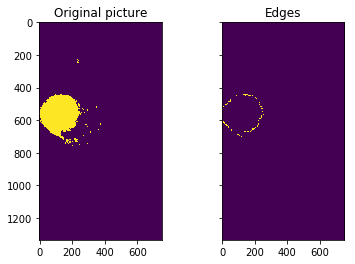

In [103]:
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1
                                , sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

ax1.set_title('Original picture')
ax1.imshow(mask)
ax2.set_title('Edges')
ax2.imshow(edges)

In [105]:
"""
# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=8,
                       min_size = 200, max_size=300)
print(result)
"""

'\n# Perform a Hough Transform\n# The accuracy corresponds to the bin size of a major axis.\n# The value is chosen in order to get a single high accumulator.\n# The threshold eliminates low accumulators\nresult = hough_ellipse(edges, accuracy=20, threshold=8,\n                       min_size = 200, max_size=300)\nprint(result)\n'

In [104]:
"""
# Estimated parameters for the ellipse
print(result)
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]
"""


'\n# Estimated parameters for the ellipse\nprint(result)\nbest = list(result[-1])\nyc, xc, a, b = [int(round(x)) for x in best[1:5]]\norientation = best[5]\n'

In [64]:
"""
# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
"""

NameError: name 'yc' is not defined

In [65]:
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

NameError: name 'cy' is not defined